In [ ]:
# import nessesory Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset_copy = dataset.copy()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Observations:
1. No Missing values
2. Seems like outliers in column (fixed acidity, residual sugar,total sulfur dioxide) but further more analysis to decide outliers.
3. means and 50% value nearly same so data appear normal distribution.
Note: these are my observation for decision do more analysis




In [ ]:
# check missing value(NA)
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing value found in dataset

In [ ]:
#check duplicate value in dataset
duplicate=dataset[dataset.duplicated()]

In [ ]:
duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [ ]:
#remove duplicate entry from dataset
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(1359, 12)

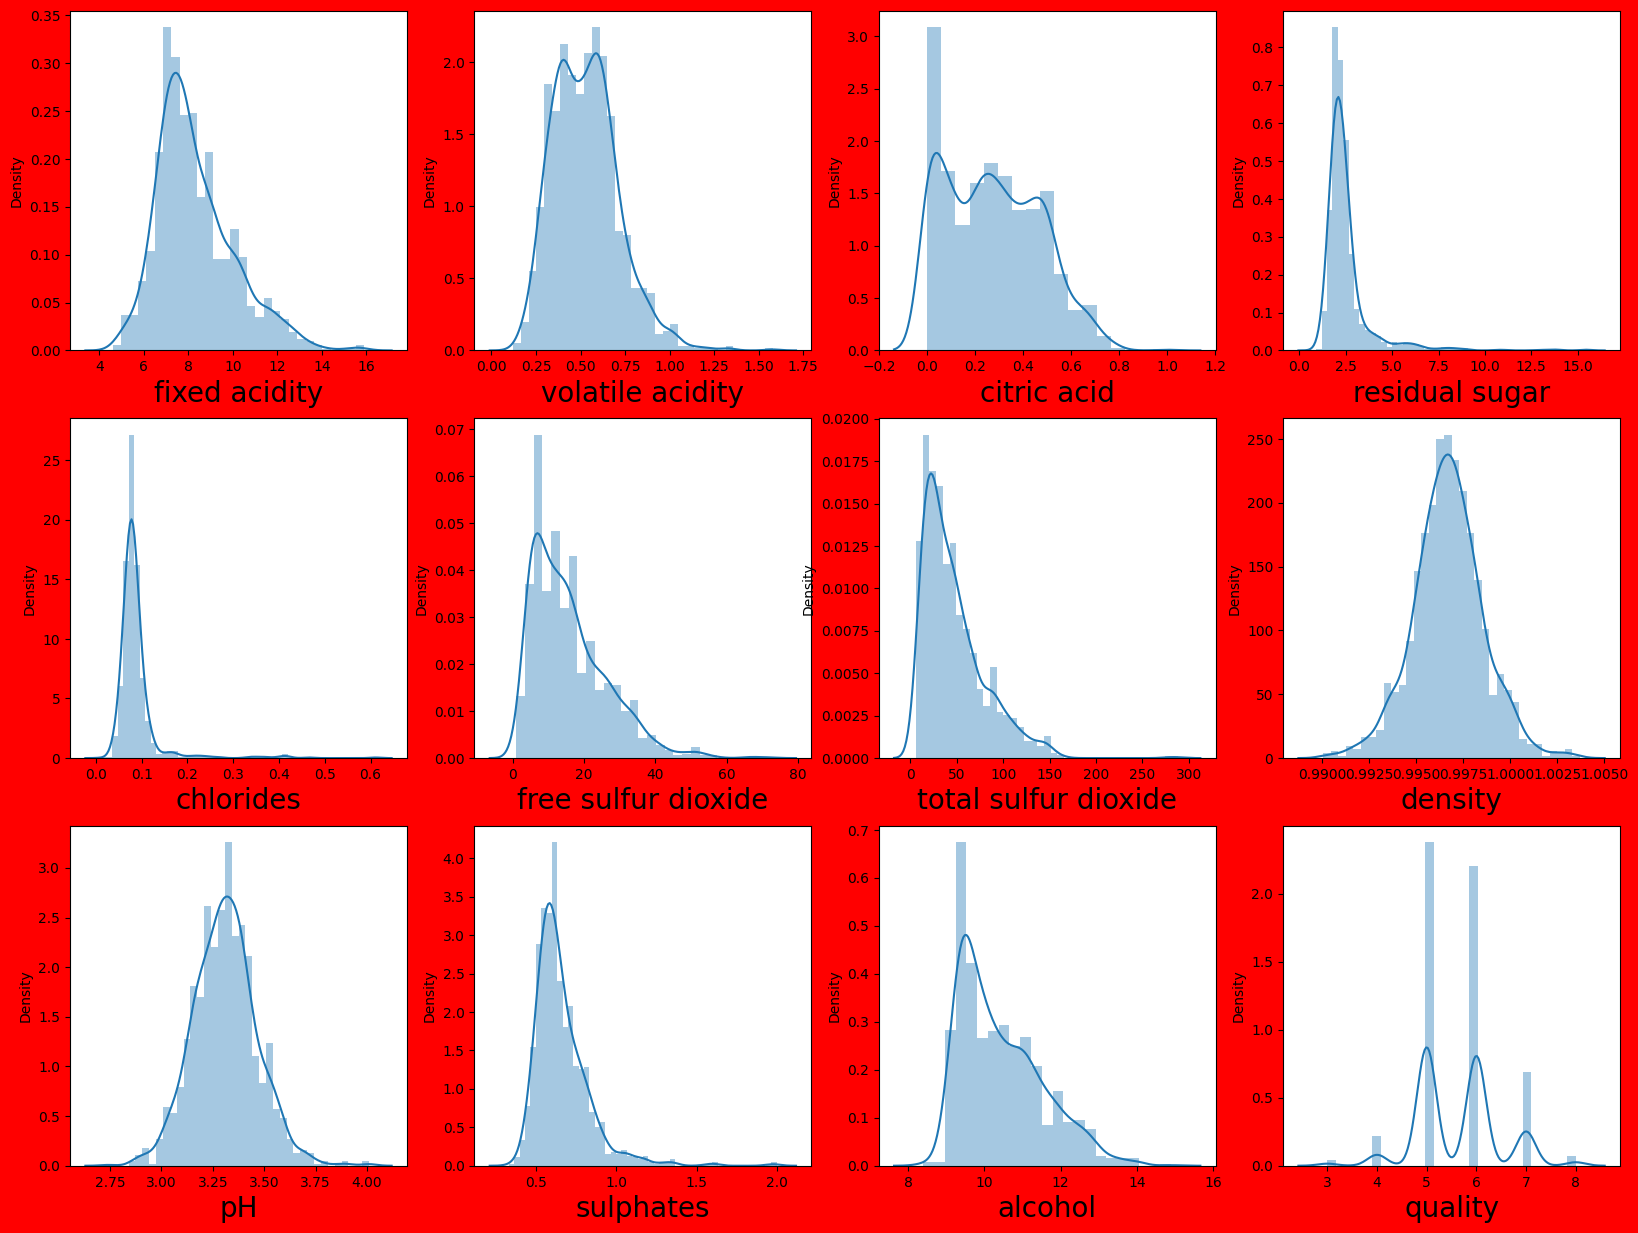

In [ ]:
# Visualization dataset
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for col in dataset.columns:
  if plotnumber < 13:
    ax = plt.subplot(3,4,plotnumber)
    sns.distplot(dataset[col])
    plt.xlabel(col, fontsize=20)
  plotnumber+=1
plt.show()

In [ ]:
y = dataset.iloc[:,-1]

In [ ]:
x = dataset.iloc[:,:-1]

In [ ]:
x.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
dtype: float64

Skewness +0.5/-0.5 is consider OK but many colum have skewness:
1. Fixed acidity
2. Volatile acidity
3. Residual sugar
4. Chlorides
5. Free sulfer dioxide
6. Total sulfer dioxide
7. sulphates

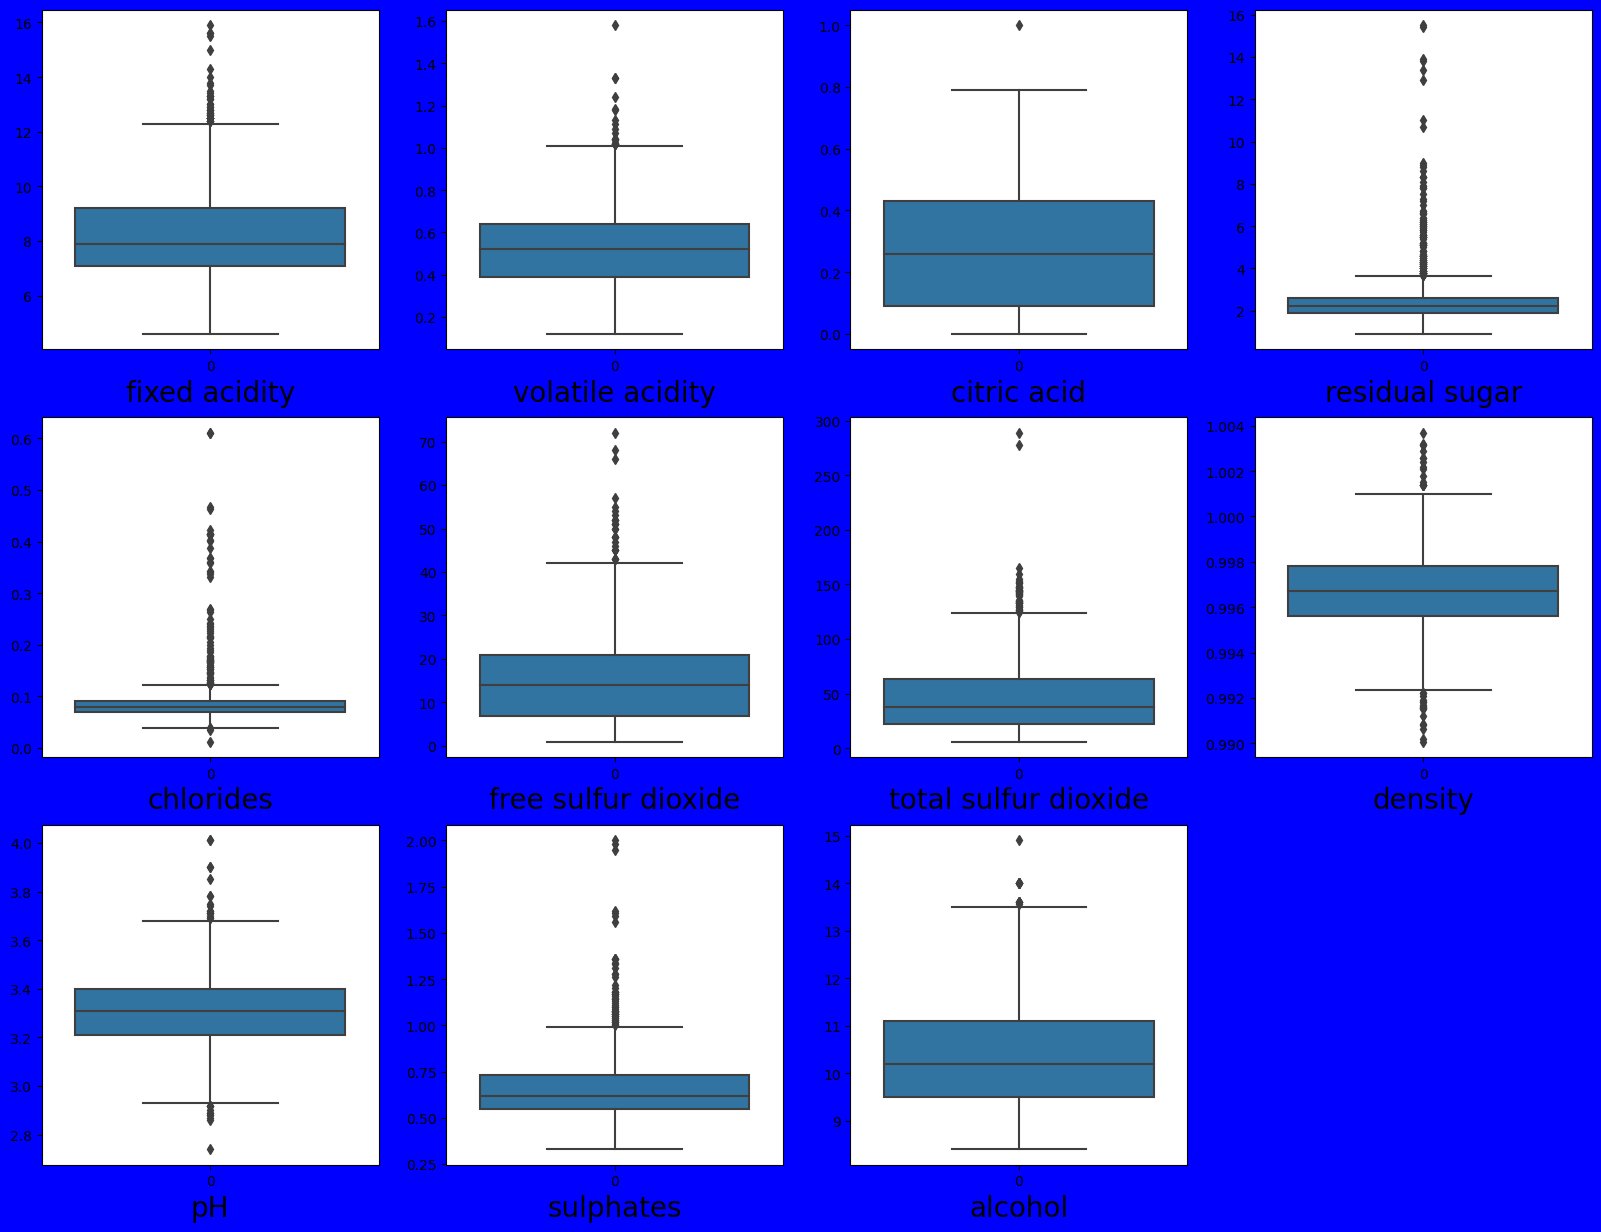

In [ ]:
plt.figure(figsize=(20,15), facecolor='Blue')
plotenum = 1

for col in x.columns:
  if plotenum < 13:
    ax = plt.subplot(3,4,plotenum)
    sns.boxplot(data=x[col])
    plt.xlabel(col, fontsize=20)
  plotenum+=1
plt.show()

By ploting BoxPlot see outliers in below columns:
1. Fixed Acidity
2. Volatile Acidity
3. Residual Sugar
4. Chlorides
5. Free sulfur dioxide
6. Total sulfur dioxide
7. density
8. PH
9. Sulphates
10. Alcohol

But we check outliers with scatter graphs

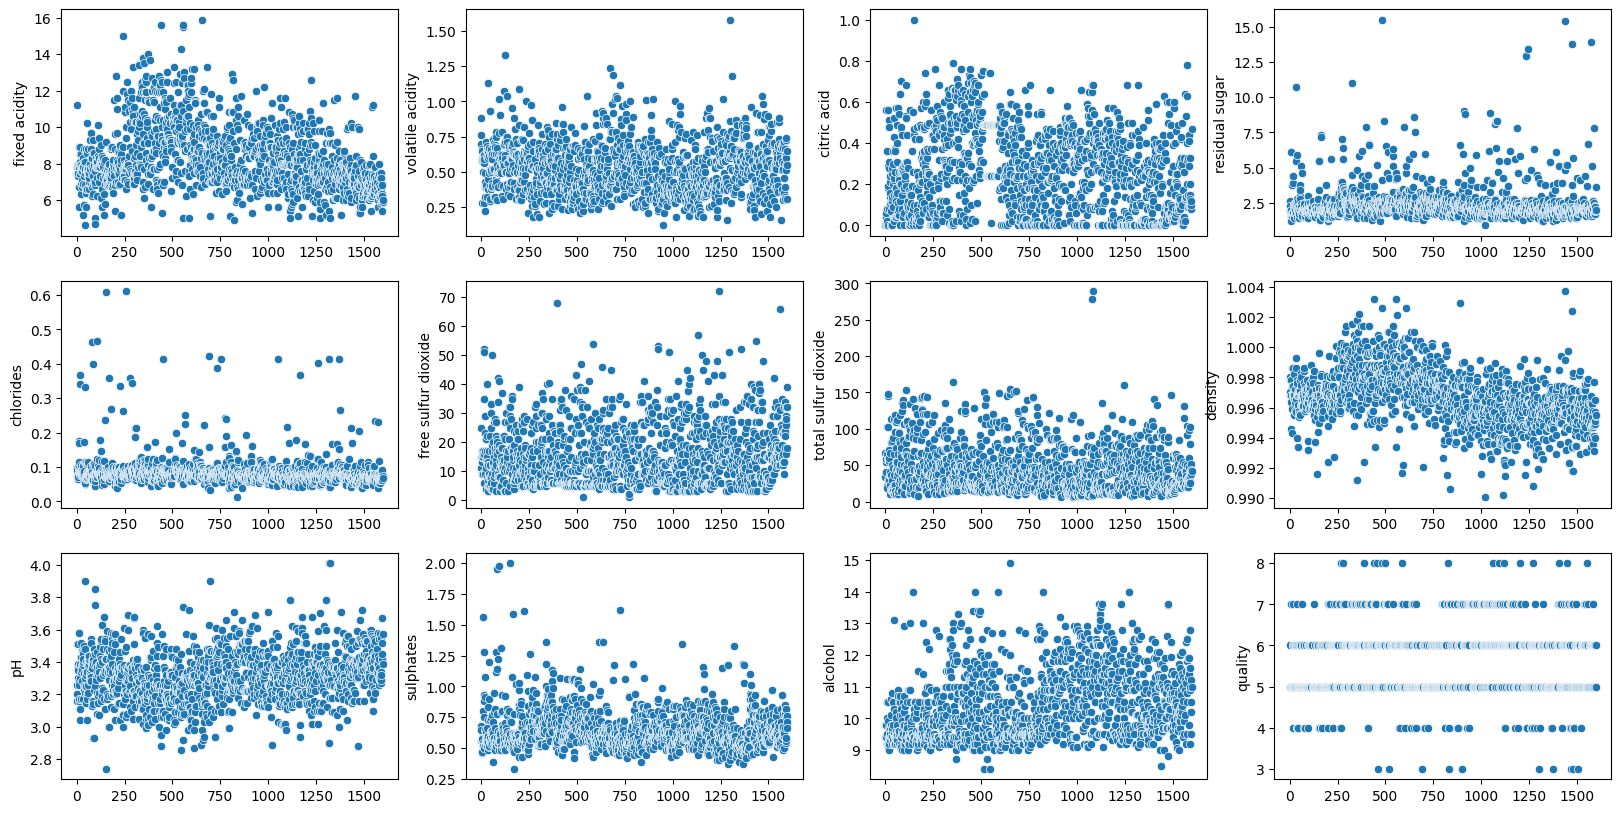

In [ ]:
plt.figure(figsize=(20,10))
plotnumber =1

for col in dataset.columns:
  if plotnumber < 14:
    ax = plt.subplot(3,4,plotnumber)
    sns.scatterplot(data=dataset[col])
  plotnumber +=1
plt.show()

In [ ]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)

IQR = q3-q1

min_lim = q1 - (1.5*IQR)
max_lim = q3 + (1.5*IQR)

In [ ]:
colunmn_x = x.columns
colunmn_x

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
df_copy = dataset.copy()

In [ ]:
df_outliers = dataset[((dataset < min_lim) | (dataset > max_lim)).any(axis=1)].reset_index(drop=True)

In [ ]:
df_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
1,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
2,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
3,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
4,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
349,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6
350,6.4,0.380,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
351,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
352,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(dataset))

In [ ]:
df_outliers_1 = dataset[(z<3).all(axis=1)]
df_outliers_1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


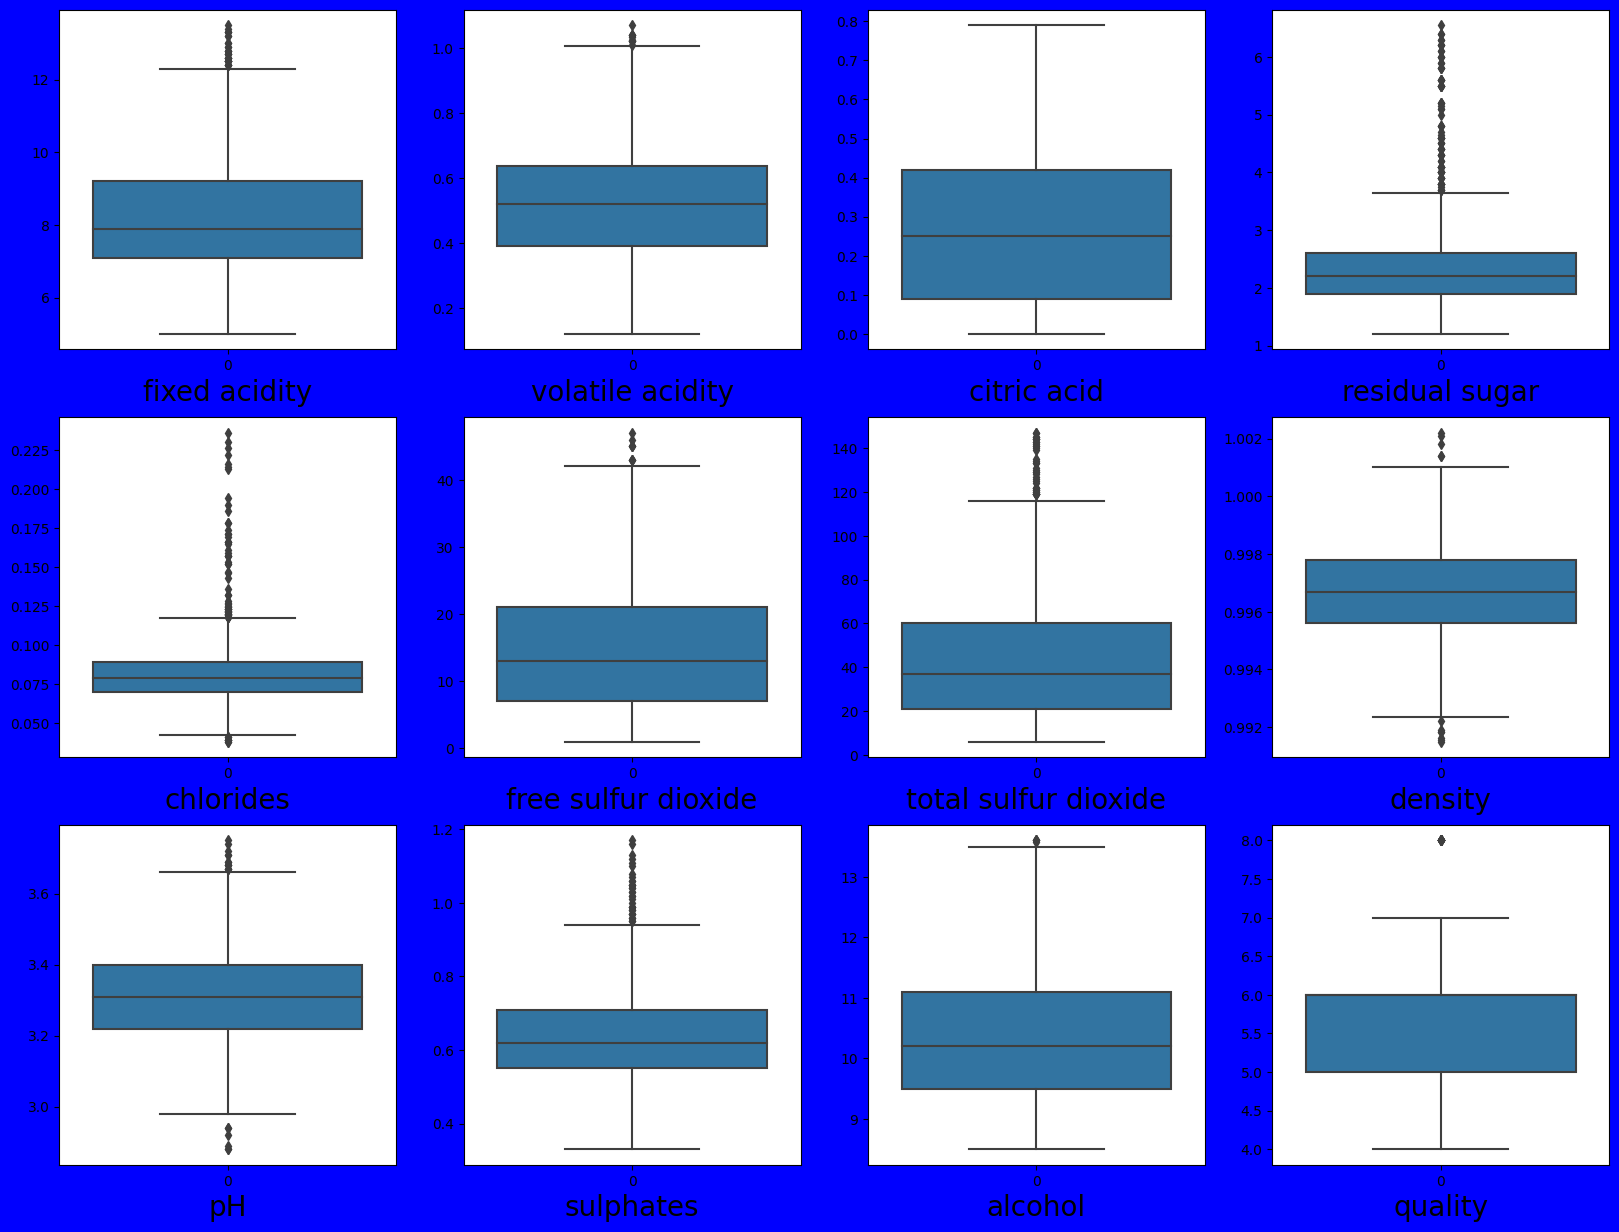

In [ ]:
plt.figure(figsize=(20,15), facecolor='Blue')
plotenum = 1

for col in df_outliers_1.columns:
  if plotenum < 13:
    ax = plt.subplot(3,4,plotenum)
    sns.boxplot(data=df_outliers_1[col])
    plt.xlabel(col, fontsize=20)
  plotenum+=1
plt.show()

In [ ]:
# % loss of data when remove outliers by IQR method
Data_loss_IQR =(354/1359)*100
Data_loss_IQR

26.048565121412803

In [ ]:
# % loss of data when remove outliers by Z score
data_loss_Z = ((1359-1232)/1359)*100
data_loss_Z

9.345106696100073

## Observation For Outliers:
1. Z score is not good for outliers in this data and we loss data more than 9%.
2. If we use IQR method then remove approximate all outliers but we loss data 26%.

So we not apply outliers removing both method. we apply transfermation technique that is RobustScaler

<Axes: >

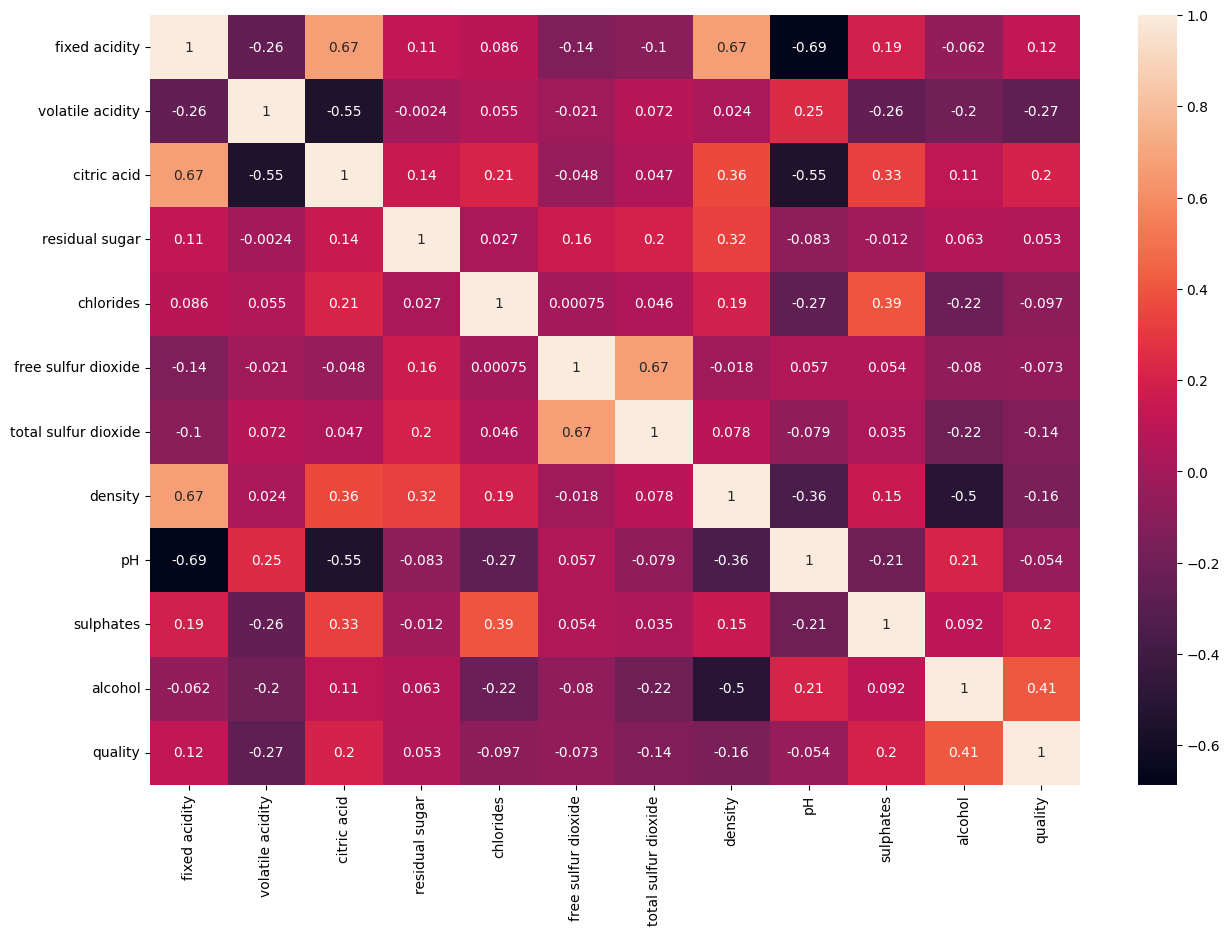

In [ ]:
# Check corelation of features
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
dataset['quality'] = dataset['quality'].apply(lambda x:1 if x>6.5 else 0)

Good--->1

Not Good---->0

In [ ]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()

In [ ]:
# create two variable for dependent feature and independent feature
x = dataset.iloc[:,:-1]
y = dataset.quality

In [ ]:
rob.fit_transform(x)

array([[-0.23809524,  0.72      , -0.76470588, ...,  1.05263158,
        -0.33333333, -0.5       ],
       [-0.04761905,  1.44      , -0.76470588, ..., -0.57894737,
         0.33333333, -0.25      ],
       [-0.04761905,  0.96      , -0.64705882, ..., -0.26315789,
         0.16666667, -0.25      ],
       ...,
       [-0.95238095,  0.12      , -0.47058824, ...,  1.10526316,
         0.77777778,  0.625     ],
       [-0.95238095,  0.5       , -0.41176471, ...,  1.36842105,
         0.5       ,  0.        ],
       [-0.9047619 , -0.84      ,  0.61764706, ...,  0.42105263,
         0.22222222,  0.5       ]])

([<matplotlib.axis.XTick at 0x7fc496cba5b0>,
 [Text(0, 0, 'Not Good'), Text(1, 0, 'Good')])

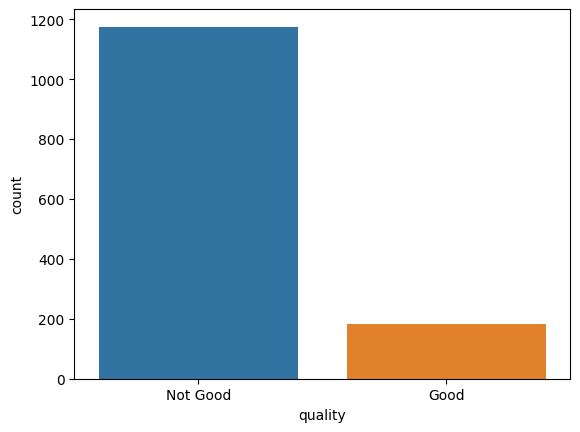

In [ ]:
sns.countplot(x=y)
plt.xticks([0,1],['Not Good','Good'])

Quality data is not balanced so apply SMOTE technique and make data balanced

In [ ]:
from imblearn.over_sampling import SMOTE
smo = SMOTE()

In [ ]:
x_smote, y_smote = smo.fit_resample(x,y)

([<matplotlib.axis.XTick at 0x7fc496eccdc0>,
 [Text(0, 0, 'Not Good'), Text(1, 0, 'Good')])

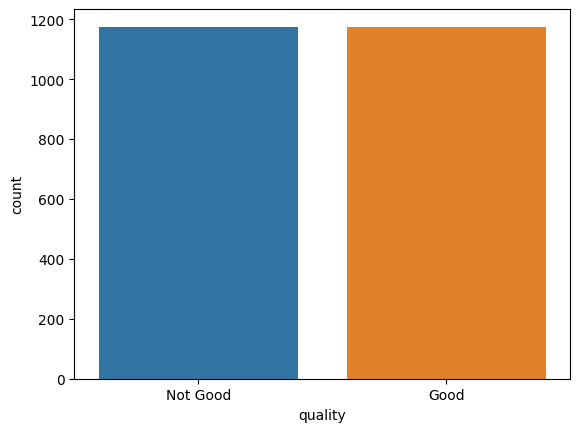

In [ ]:
sns.countplot(x=y_smote)
plt.xticks([0,1],['Not Good','Good'])

In [ ]:
# data Train test split
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=4)

In [ ]:
def model_train(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  cv = cross_val_score(clf,x_train,y_train, cv=5)
  auc_score = roc_auc_score(y_test, y_pred)
  cv_score = str(round(cv.mean()*100,2)) + '%'

  return auc_score, cv_score


In [ ]:
# algorithm libraries import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [ ]:
lr = LogisticRegression()
etc = ExtraTreeClassifier()
dt = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rmf = RandomForestClassifier()
knn = KNeighborsClassifier()
bgc = BaggingClassifier()
svc = SVC()

In [ ]:
clfs ={
    'LR':lr,
    'ETC':etc,
    'DT':dt,
    'GBC':gbc,
    'RMF':rmf,
    'KNN':knn,
    'BGC':bgc,
    'SVC':svc
}

In [ ]:
model_train(lr,x_train,y_train,x_test,y_test)

(0.8321531465861363, '81.89%')

In [ ]:
auc_scores = []
CV_scores = []

for name,model in clfs.items():
  auc_score, cv_score = model_train(model,x_train,y_train,x_test,y_test)
  auc_scores.append(auc_score)
  CV_scores.append(cv_score)

In [ ]:
df = pd.DataFrame({'Algorithm':clfs.keys(),'AUC Score':auc_scores,'CV Scores':CV_scores}).sort_values('CV Scores', ascending=False)
df

,Algorithm,AUC Score,CV Scores
4,RMF,0.912076,91.09%
3,GBC,0.877885,89.05%
6,BGC,0.869121,88.93%
2,DT,0.874275,85.75%
1,ETC,0.833524,83.54%
5,KNN,0.870023,82.86%
0,LR,0.832153,81.89%
7,SVC,0.715228,71.0%


## Best performnce model is Random Forest

In [ ]:
import pickle

In [ ]:
pickle.dump(rmf,open('redwinequalitypredictor.pkl','wb'))